# Compute amplification factor
Here we will compute the amplification factor for a custom lens profile.

### Import modules 

In [ ]:
from jax import jit
import jax.numpy as jnp

from glworia.amp.lens_model import LensModel
from glworia.amp.amplification_factor import (amplification_computation_prep, 
                                          crtical_curve_interpolants,
                                          compute_F)
from glworia.amp.root import make_crit_curve_helper_func
import matplotlib.pyplot as plt

### Fermat potential

Here we will consider the Plummer model, with a Fermat potential given by
$$ \psi(x) = \frac{\kappa}{2} \log \left( 1 + x^2\right). $$
We will have to write a `PlummerLens` class and specify the Fermat potential in the `get_Psi` method.
The function should be written with `jax.numpy` functions and the `@jit` decorator.

We also implemented the NFW, gSIS and CIS lenses, which are located in the `glworia.amp.lens_model` module.

In [2]:
class PlummerLens(LensModel):

    def __init__(self):
        pass

    def get_Psi(self):
        @jit
        def Psi_Plummer(x, lens_params):
            kappa = lens_params[0]
            return kappa / 2 * jnp.log(1 + jnp.linalg.norm(x)**2)
        return Psi_Plummer

Construct the relevant functions (e.g. $\vec{\nabla} \psi$) for searching for the image positions and computing the amplification

In [3]:
lm = PlummerLens()
Psi_Plummer = lm.get_Psi()
T_funcs, helper_funcs = amplification_computation_prep(Psi_Plummer)
crit_curve_helper_funcs = make_crit_curve_helper_func(T_funcs)

Compute the caustic curve in the $y$-$l$ plane and make an interpolator for the curve.

In [4]:
param_arr = jnp.linspace(0.1, 10., 100000)
crit_funcs = crtical_curve_interpolants(param_arr, T_funcs, crit_curve_helper_funcs)

### Compute and plot the results

In [5]:
ws = jnp.logspace(-2, 4, 10**5) # dimensionless frequency array to compute the amplification factor at
y = jnp.array([0.1, 0.]) # y[1] has to be 0 for now
lens_params = jnp.array([5.]) # this is kappa

N = 200 # number of points in time to do the contour integral in each segment
T0_max = 1000. # the contour with the largest time to be computed

F_interp, _, _, _ = compute_F(ws, y, lens_params, T_funcs, helper_funcs, crit_funcs,
              N, T0_max)

Text(0, 0.5, '$|F|$')

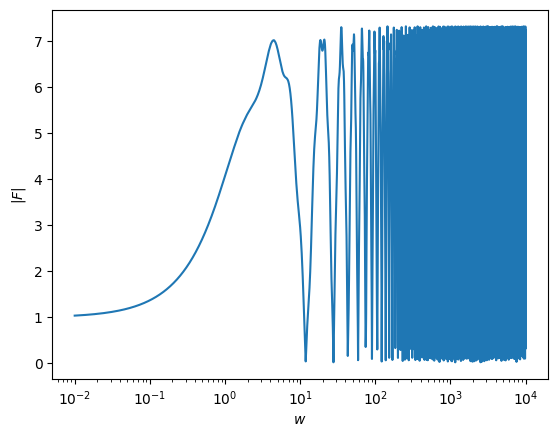

In [6]:
fig, ax = plt.subplots()
ax.semilogx(ws, jnp.abs(F_interp))
ax.set_xlabel(r'$w$')
ax.set_ylabel(r'$|F|$')